Raghavendra Choudhary

# Prediction using Supervised ML

# Problem Statement:-

Predict the percentage of an student based on the no. of study hours.

In [114]:
# importing all the important libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
#loading the data sets
url= "http://bit.ly/w-data"
df=pd.read_csv(url)

# Data Discovery

In [116]:
# Understanding data 
df.shape

(25, 2)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [118]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [119]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [120]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:>

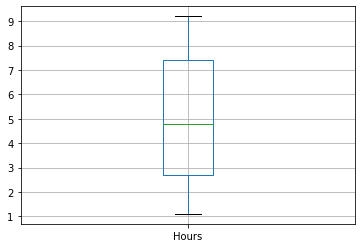

In [121]:
# Ploting the box-plot for knowing the outliers present in the dataset

df.boxplot("Hours")

<AxesSubplot:>

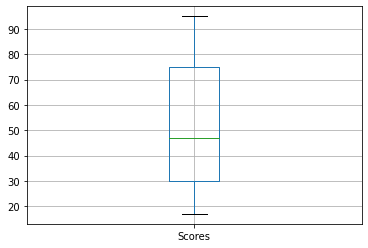

In [122]:
df.boxplot("Scores")

In [123]:
# For checking the Null-Values presents in the Dataset
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

From the above, we see that there are no outliers and no null values. Thus, our data is ready for modelling.


# Data Visualization

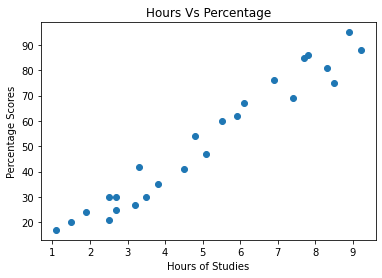

In [124]:
x=df.Hours
y=df.Scores
plt.xlabel("Hours of Studies")
plt.ylabel("Percentage Scores")
plt.title("Hours Vs Percentage")
plt.scatter(x,y)
plt.show()

C:\Users\Dell_owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


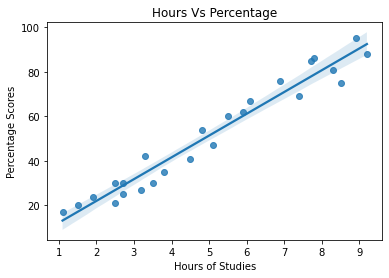

In [125]:
import seaborn as sb

ax=sb.regplot(x,y)
print(ax)
plt.xlabel("Hours of Studies")
plt.ylabel("Percentage Scores")
plt.title("Hours Vs Percentage")
plt.show()

From the graph we can see that x and y points are linearly related.

# Data Modeling 

In [126]:
# Preparing the data

In [127]:
X=df["Hours"].values
#print(X)
X=X.reshape(-1,1)
#print(X)
Y=df["Scores"].values
#print(Y)
Y=Y.reshape(-1,1)
#print(Y)

In [128]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,train_size=0.8,random_state=0)


In [129]:
# Training the algorithm
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
print("Intercept =",lr.intercept_)
print("Coefficient =",lr.coef_)

Intercept = [2.01816004]
Coefficient = [[9.91065648]]


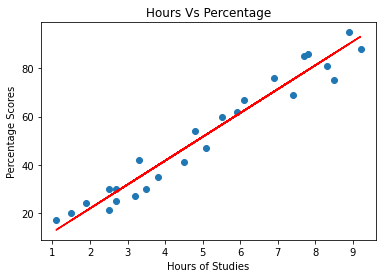

In [130]:
line1= lr.predict(X)
plt.scatter(x,y)
plt.plot(x,line1,color = "r")
plt.xlabel("Hours of Studies")
plt.ylabel("Percentage Scores")
plt.title("Hours Vs Percentage")
plt.show()

# Data Deployment

In [131]:
Y_pred=lr.predict(X_test)
Y_test.reshape(1,-1), Y_pred.reshape(1,-1)
hours=float(input())
final_pred=lr.predict([[hours]])
final_pred

print("The person who has studied for",hours , "hours will score" ,final_pred, "percentage.")

9.25
The person who has studied for 9.25 hours will score [[93.69173249]] percentage.


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Dell_owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell_owner\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


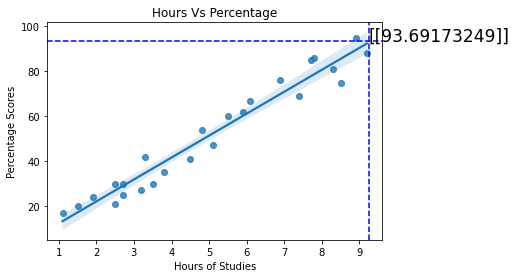

In [132]:
import seaborn as sb

ax=sb.regplot(x,y)
print(ax)
plt.xlabel("Hours of Studies")
plt.ylabel("Percentage Scores")
plt.title("Hours Vs Percentage")
plt.axvline(hours,color="b",linestyle="dashed")
plt.axhline(final_pred,color="b",linestyle="dashed")
plt.text(hours,final_pred,final_pred,fontsize=17)
plt.show()

In [133]:
# Evaluating the algorithm
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [134]:
# mean_squared_error
mean_squared_error(Y_pred, Y_test)

21.5987693072174

In [135]:
# mean_absolute_error 
mean_absolute_error(Y_pred, Y_test)

4.183859899002975

# Conclusion

What will be predicted score if a student studies for 9.25 hrs/day?

The students studies who studies for 9.25 hrs/day will get 93.69%